<a href="https://colab.research.google.com/github/ImolaFodor/probabilistic-ML/blob/main/HW02_pyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://pyro.ai/examples/intro_long.html

In [1]:
%reset -s -f

In [2]:
!pip3 install pyro-ppl

     |████████████████████████████████| 718 kB 5.1 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.11.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.11.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.11.0 which is incompatible.


In [3]:
import torch
import pyro
pyro.set_rng_seed(1) # for reproducibility

import seaborn as sns
import matplotlib.pyplot as plt
import pyro.distributions as dist
# distributions
exp = dist.Exponential(0.5)
# multiple samples

exp_samples = [pyro.sample("e",exp) for i in range(200)]

0.5945586805011932


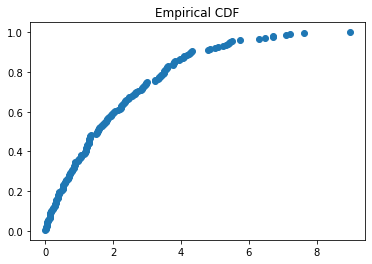

In [4]:
import numpy as np

def ecdf(dist, k, n_samples):
    samples = [pyro.sample("d",dist) for i in range(n_samples)]
    x = np.sort(samples)
    y = np.arange(1, n_samples+1) / n_samples
    result = np.interp(k, x,y)
    plt.scatter(x=x, y=y);
    plt.title("Empirical CDF")
    plt
    print(result)

ecdf(exp, 2, 200)

III Exercise

0.3723704184560072


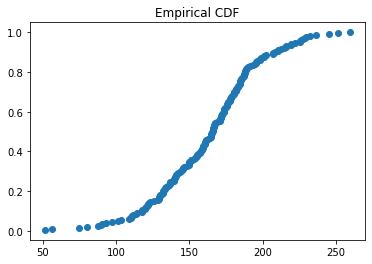

In [16]:
normal = dist.Normal(166, 36)
ecdf(normal, 155, 200)

0.9639393436542179


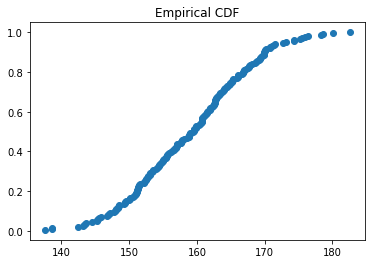

In [10]:
ecdf(normal, 175, 200)

In [7]:
import math

mu_0 = 160
sigma_0 = 3
sigma_post = 6

x = [174, 158, 194, 167]
x_i = 693/4 #sum

mu_post = (160/9 + 693/36)/(1/9 + 4/36)

print(mu_post)

166.625


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


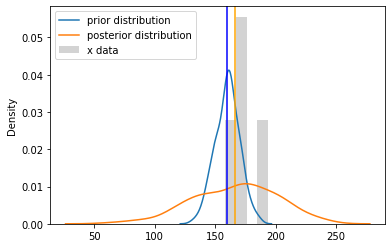

In [29]:


# distribution
normal_prior = dist.Normal(160, 9)
normal_post = dist.Normal(166, 36)

normal_prior_samples = [pyro.sample("normal",normal_prior) for i in range(200)]
normal_post_samples = [pyro.sample("normal",normal_post) for i in range(200)]

#plot
sns.distplot(normal_prior_samples,label='prior distribution', hist = False)
sns.distplot(normal_post_samples, label='posterior distribution', hist = False)
plt.hist(x, bins=4, range=None, density=True, color = "lightgray", label="x data")

plt.legend()
plt.axvline(x=mu_0,
            color='blue')
plt.axvline(x=mu_post,
            color='orange')
plt.show()